### AXIALLY-LOADED BAR PROBLEM

### GALERKIN EXAMPLE



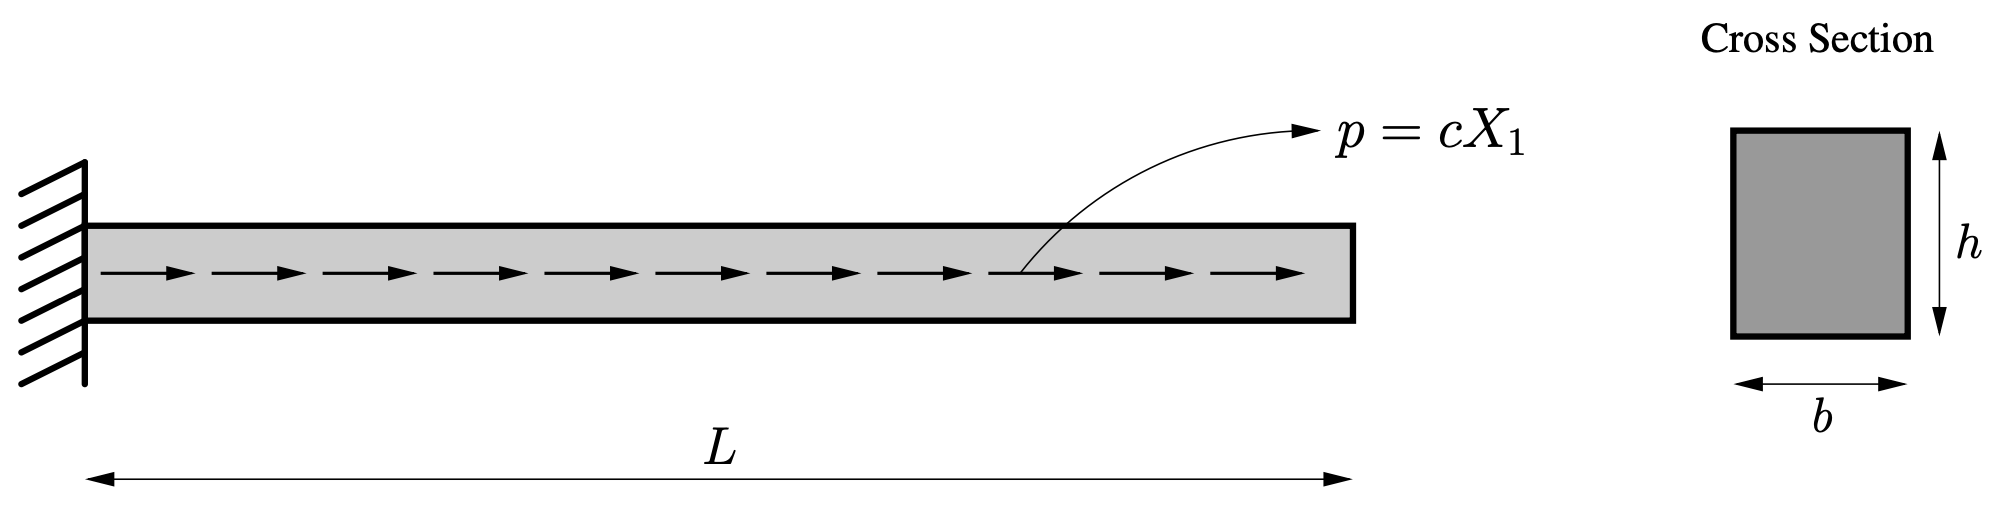


In [1]:
import sympy
from sympy import symbols
from sympy.plotting import plot

In [3]:
x = symbols('x')

In [5]:
a0, a1, a2 = symbols('a0 a1 a2')
phi0, phi1, phi2 = symbols('phi0 phi1 phi2')

In [7]:
phi0 = 1
phi1 = x
phi2 = x**2

In [9]:
E = 20e6
L = 1.0
c = 2.0
b = 0.3
h = 0.5
A = b*h

In [11]:
u_app = a0*phi0 + a1*phi1 + a2*phi2

In [13]:
BC1 = u_app.subs(x,0)

In [15]:
u_app

a0 + a1*x + a2*x**2

In [17]:
BC_sol = sympy.solve([BC1],[a0])

In [19]:
u_app = u_app.subs(a0,BC_sol[a0])

In [21]:
u_app

a1*x + a2*x**2

In [23]:
LHS1 = sympy.integrate(sympy.diff(phi1,x)*E*A*sympy.diff(u_app,x),(x,0,L))
LHS2 = sympy.integrate(sympy.diff(phi2,x)*E*A*sympy.diff(u_app,x),(x,0,L))

In [25]:
RHS1 = sympy.integrate(phi1*(c*x),(x,0,L))
RHS2 = sympy.integrate(phi2*(c*x),(x,0,L))

In [27]:
eq_sol = sympy.solve([LHS1-RHS1, LHS2-RHS2],[a1, a2])

In [29]:
eq_sol

{a1: 3.88888888888889e-7, a2: -1.66666666666667e-7}

In [31]:
u_app = u_app.subs(a1,eq_sol[a1])
u_app = u_app.subs(a2,eq_sol[a2])

In [33]:
u_app

-1.66666666666667e-7*x**2 + 3.88888888888889e-7*x

In [35]:
from sympy import symbols, Function, dsolve, Eq, diff, solve, simplify
import sympy
import matplotlib.pyplot as plt
x_, E_, b_, h_, c_, L_ = symbols('x_ E_ b_ h_ c_ L_')
u_true = Function('u')(x_)

In [37]:
up = u_true.diff(x_)
eqn = (E_*(b_*h_)*up).diff(x_) + c_*x_

In [39]:
u_general = dsolve(eqn).rhs

In [41]:
u_general

C1 + C2*x_ - c_*x_**3/(6*E_*b_*h_)

In [43]:
bc1 = Eq(u_general.subs(x_, 0), 0)
bc2 = Eq((E_*(b_*h_)*diff(u_general, x_)).subs(x_, L_), 0)

In [45]:
C1, C2 = symbols('C1 C2')
consts = solve([bc1, bc2], (C1, C2))
u_true = u_general.subs(consts)
vals = {E_: 20e6, b_: 0.3, h_: 0.5, c_: 2, L_: 1.0}
u_true = u_true.subs(vals)

In [47]:
u_true

-1.11111111111111e-7*x_**3 + 3.33333333333333e-7*x_

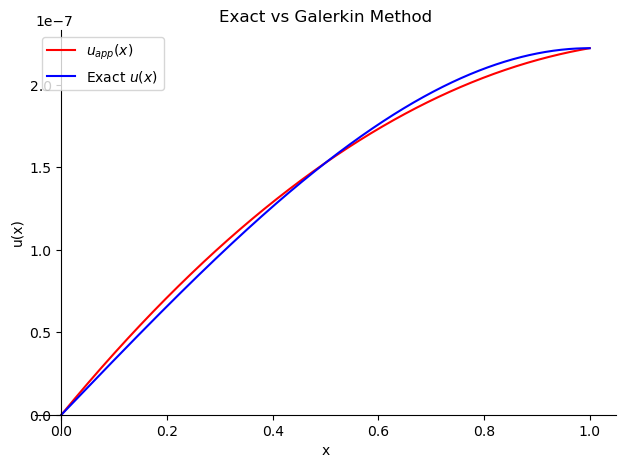

In [49]:
plt = plot( (u_app, (x, 0, 1)), (u_true, (x_, 0, 1)), show=False)
#
plt[0].line_color = 'red'
plt[0].label = '$u_{app}(x)$'
plt[1].line_color = 'blue'
plt[1].label = 'Exact $u(x)$'
#
plt.legend = True
plt.title = 'Exact vs Galerkin Method'
plt.xlabel = 'x'
plt.ylabel = 'u(x)'
plt.show()